[Implementación RBF-NN](https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319)


In [1]:
!pip3 install scikit-elcs

You should consider upgrading via the '/Users/cristiandiazalvarez/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import confusion_matrix
import seaborn as sns


from skeLCS import eLCS

import matplotlib.pyplot as plt
%matplotlib inline

### Data Import

In [3]:
!git clone https://github.com/CristianDiazAlvarez/temporal.git
df = pd.read_csv("temporal/diabetes_data_upload.csv")
df.iloc[:,1:] = df.iloc[:,1:].apply(LabelEncoder().fit_transform)
df.head()

fatal: destination path 'temporal' already exists and is not an empty directory.


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## AG

### n_buckets vs empty_buckets

[  2   4   8  16  32  64 128 256]


Text(0, 0.5, 'Buckets Vacios [%]')

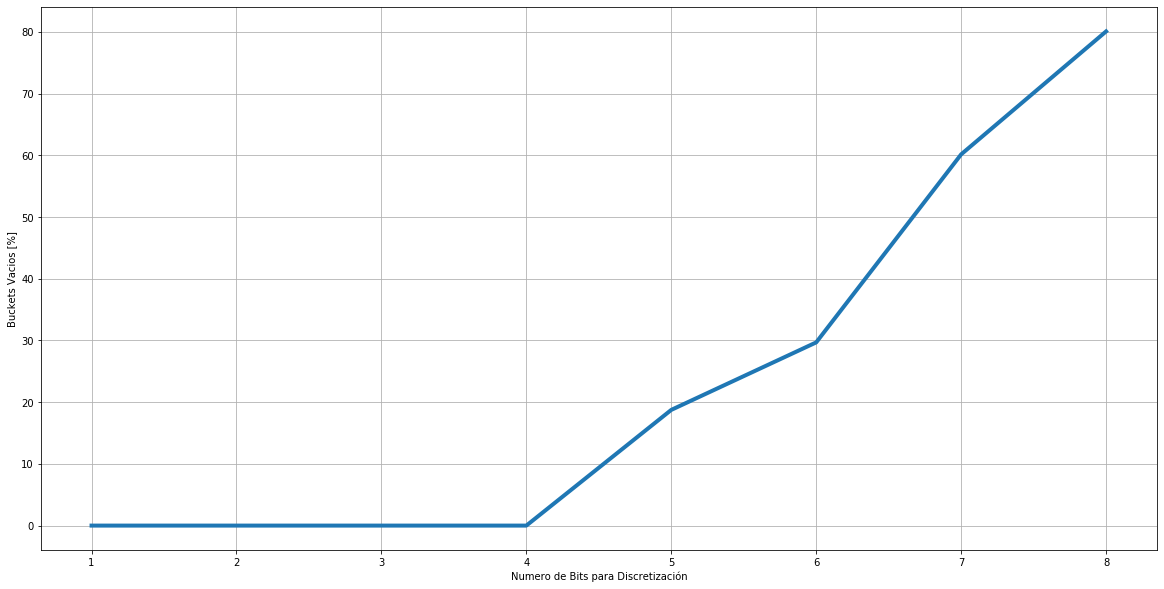

In [4]:
bins = 2**np.array(range(1,9))
print(bins)
h = []
for n_bins in bins:
  h.append(sum(pd.cut(df["Age"], bins=n_bins, labels=range(n_bins)).value_counts() == 0)*100/n_bins)

plt.figure(figsize=(20,10))
plt.plot(range(1,9),h,linewidth=4)
plt.grid()
plt.xticks(range(1,9))
plt.rcParams.update({'font.size': 20})
plt.xlabel('Numero de Bits para Discretización')
plt.ylabel('Buckets Vacios [%]')


### Implementation

In [8]:
parameters = {
    "N": [91, 182, 273, 364],
    "chi": [0.2, 0.8],
    "mu": [0.04, 0.1],
    "selection_method": ["tournament", "roulette"],
    "theta_sel": [0.25, 0.5, 0.75]
}

clfs = []
for n_bits in range(1,6):
    age_buckets = pd.cut(df["Age"], bins=2**n_bits, labels=range(2**n_bits)).to_frame()
    age_buckets = list(age_buckets["Age"].apply(lambda x: ("{0:0%sb}" % n_bits).format(x)).values)
    age_buckets = [list(x) for x in age_buckets]
    age_buckets = [[int(y) for y in x] for x in age_buckets]
    age_buckets = pd.DataFrame(data=np.array(age_buckets), columns=["Age_{}".format(x) for x in range(n_bits)])

    X = pd.concat([age_buckets,df.iloc[:,1:-1]],axis=1)
    print("Features header {}".format(list(X.columns)))

    X=X.to_numpy()
    y = df["class"].to_numpy()
  
    clf = GridSearchCV(eLCS(), parameters, n_jobs=-1, verbose=1,cv=3, return_train_score = True) 
    
    clf.fit(X,y)
    clfs.append(clf)

Features header ['Age_0', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  8.2min finished
/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Features header ['Age_0', 'Age_1', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  8.1min finished
/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Features header ['Age_0', 'Age_1', 'Age_2', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  8.1min finished
/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Features header ['Age_0', 'Age_1', 'Age_2', 'Age_3', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  7.3min finished
/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Features header ['Age_0', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  7.3min finished
/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
clfs[4].best_estimator_

eLCS(N=364, acc_sub=0.99, beta=0.2, chi=0.2, delta=0.1,
     discrete_attribute_limit=10, do_GA_subsumption=True,
     do_correct_set_subsumption=False, fitness_reduction=0.1, init_fit=0.01,
     learning_iterations=10000, match_for_missingness=False, mu=0.04, nu=5,
     p_spec=0.5, random_state=None, reboot_filename=None,
     selection_method='tournament',
     specified_attributes=array([], dtype=float64), theta_GA=25, theta_del=20,
     theta_sel=0.75, theta_sub=20, track_accuracy_while_fit=False)

In [54]:
resultados = pd.DataFrame()

for i in range(5):
    pd_results = pd.DataFrame(clfs[i].cv_results_)
    pd_results.to_csv('clfs_'+str(i)+'.csv', index=False)
    pd_results = pd_results.sort_values(by='rank_test_score',ascending=False)
    temp = pd_results.head(1)
    temp['n_bits'] = i+1
    resultados = resultados.append(temp)

final_results = resultados.sort_values(by='mean_test_score',ascending=False)

display(final_results)

#pd.set_option('display.max_columns', None)

/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_N,param_chi,param_mu,param_selection_method,param_theta_sel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,n_bits
21,6.087656,0.116878,0.098201,0.004343,91,0.8,0.1,roulette,0.25,"{'N': 91, 'chi': 0.8, 'mu': 0.1, 'selection_me...",0.669549,0.750732,0.886650,0.768525,0.089438,96,2
12,4.965073,0.293521,0.085286,0.002674,91,0.8,0.04,tournament,0.25,"{'N': 91, 'chi': 0.8, 'mu': 0.04, 'selection_m...",0.762938,0.680778,0.838479,0.760433,0.064343,96,1
20,6.681481,0.063768,0.113710,0.005897,91,0.8,0.1,tournament,0.75,"{'N': 91, 'chi': 0.8, 'mu': 0.1, 'selection_me...",0.684545,0.767401,0.750429,0.734062,0.035791,96,4
7,6.068190,0.065922,0.103237,0.006542,91,0.2,0.1,tournament,0.5,"{'N': 91, 'chi': 0.2, 'mu': 0.1, 'selection_me...",0.687265,0.784349,0.711549,0.727783,0.041318,96,3
5,5.826704,0.219884,0.091675,0.005433,91,0.2,0.04,roulette,0.75,"{'N': 91, 'chi': 0.2, 'mu': 0.04, 'selection_m...",0.747873,0.644372,0.661378,0.684630,0.045382,96,5


In [49]:
y_pred = clfs[4].best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm
#sns.heatmap(cm, annot=True, fmt="d")


array([[0.95  , 0.05  ],
       [0.0125, 0.9875]])

### Lectura de resultados desde archivos CSV

In [56]:
pd_saved = []
for i in range(5):
    pd_saved.append(pd.read_csv('clfs_'+str(i)+'.csv', sep=',', index_col=0))

In [59]:
resultados_guardados = pd.DataFrame()
for i in range(5):
    pd_results_saved = pd_saved[i].sort_values(by='rank_test_score',ascending=False)
    temp = pd_results_saved.head(1)
    temp['n_bits'] = i+1
    resultados_guardados = resultados_guardados.append(temp)

final_results_saved = resultados_guardados.sort_values(by='mean_test_score',ascending=False)

display(final_results_saved)

/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,std_fit_time,mean_score_time,std_score_time,param_N,param_chi,param_mu,param_selection_method,param_theta_sel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,n_bits
mean_fit_time,,,,,,,,,,,,,,,,
6.087656,0.116878,0.098201,0.004343,91,0.8,0.10,roulette,0.25,"{'N': 91, 'chi': 0.8, 'mu': 0.1, 'selection_me...",0.669549,0.750732,0.886650,0.768525,0.089438,96,2
4.965073,0.293521,0.085286,0.002674,91,0.8,0.04,tournament,0.25,"{'N': 91, 'chi': 0.8, 'mu': 0.04, 'selection_m...",0.762938,0.680778,0.838479,0.760433,0.064343,96,1
6.681481,0.063768,0.113710,0.005897,91,0.8,0.10,tournament,0.75,"{'N': 91, 'chi': 0.8, 'mu': 0.1, 'selection_me...",0.684545,0.767401,0.750429,0.734062,0.035791,96,4
6.068190,0.065922,0.103237,0.006542,91,0.2,0.10,tournament,0.50,"{'N': 91, 'chi': 0.2, 'mu': 0.1, 'selection_me...",0.687265,0.784349,0.711549,0.727783,0.041318,96,3
5.826704,0.219884,0.091675,0.005433,91,0.2,0.04,roulette,0.75,"{'N': 91, 'chi': 0.2, 'mu': 0.04, 'selection_m...",0.747873,0.644372,0.661378,0.684630,0.045382,96,5


### Testing

In [ ]:
n_bits = 5
age_buckets = pd.cut(df["Age"], bins=2**n_bits, labels=range(2**n_bits)).to_frame()

In [ ]:
age_buckets = list(age_buckets["Age"].apply(lambda x: ("{0:0%sb}" % n_bits).format(x)).values)
age_buckets = [list(x) for x in age_buckets]
age_buckets = [[int(y) for y in x] for x in age_buckets]
age_buckets = pd.DataFrame(data=np.array(age_buckets), columns=["Age_{}".format(x) for x in range(n_bits)])
age_buckets

In [ ]:
X = pd.concat([age_buckets,df.iloc[:,1:-1]],axis=1)
headers = np.array(["_".join(x.lower().split()) for x in list(X.columns)])

X = X.to_numpy()
y = df["class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2020)

In [ ]:
X_train.shape

In [ ]:
from skeLCS import eLCS

model = eLCS(track_accuracy_while_fit=True)

In [ ]:
trainedModel = model.fit(X_train,y_train)

In [ ]:
1-(sum(abs(trainedModel.predict(X_test)-y_test))/len(y_test))

In [ ]:
0.9423076923076923

In [ ]:
trainedModel.export_final_rule_population(headers,"Diabetes?")

populationData2 = pd.read_csv("populationData.csv")
# display(populationData2)
populationData2[]

In [ ]:
parameters = {
    "N": [91, 182, 273, 364],
    "chi": [0.2, 0.8],
    "mu": [0.04, 0.1],
    "selection_method": ["tournament", "roulette"],
    "theta_sel": [0.25, 0.5, 0.75]
}

clf = GridSearchCV(eLCS(), parameters, n_jobs=-1, verbose=1,cv=3) 
clf.fit(X_train,y_train)